In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import random
import os
import sys
import subprocess
import re



Definiciones

In [2]:
def writeGraph(grafo,file_output):
    with open(file_output, 'w') as f:
        f.write(str(len(grafo))+'\n')
        f.write(str(grafo.number_of_edges())+'\n')
        for eje in list(grafo.edges):
            f.write(str(eje[0]+1)+' '+str(eje[1]+1)+'\n')
            
def readGraph(file_input):
    ejes = []
    with open(file_input, 'r') as f:
        nodos = f.readline()
        ejes = f.readline()
        for line in f:
            ejes.append((line.split(' ')[0],line.split(' ')[1]))
    return ejes               

## Variamos cantidad nodos

In [116]:
start = 1000
cuantos = 20
distancia = 50
repeticiones = 1
proporcion_ejes = 15

nodos = [start+distancia*x for x in range(0,cuantos)]
ejes_de_nodos = [x*2 for x in nodos]
ejes_de_nodos
nodos

[1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950]

In [117]:
ejecutable = '../src/tp1'
p = 0.85
file_input = 'cuantitativos/test-nodos'
file_tiempos = 'tiempos-nodos.txt'
file_output = file_input


In [118]:

tiempos = []
for vertex in nodos:
    grafo = nx.gnm_random_graph(vertex, 2000, seed=1687980, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(vertex, 2000, seed=1687980, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones)
    tiempos.append(tiempo_acum)
    

In [119]:
tiempos

[19851000.0,
 12638300.0,
 12338600.0,
 8510450.0,
 10603000.0,
 5639670.0,
 6767380.0,
 4766800.0,
 2865820.0,
 1997930.0,
 2926320.0,
 1945510.0,
 1982340.0,
 2480880.0,
 2281280.0,
 2295780.0,
 2598470.0,
 2294470.0,
 2526400.0,
 2416960.0]

In [90]:
[z for z in range(1000,2000)]

[1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,

In [115]:
with open(file_tiempos, 'w') as f:
    for n, t in zip(nodos,tiempos):
        f.write(str(n)+' '+str(t)+'\n')
tiempos

[5478220000.0,
 6241080000.0,
 7216600000.0,
 8067510000.0,
 9675390000.0,
 10600100000.0,
 11608300000.0,
 13341200000.0,
 14407800000.0,
 16804400000.0,
 19374000000.0,
 21505200000.0,
 24532100000.0,
 25024000000.0,
 28198000000.0,
 31819500000.0,
 35333700000.0,
 36902300000.0,
 38022400000.0,
 44949000000.0]

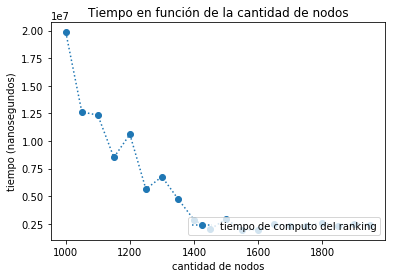

In [122]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(nodos, tiempos, marker='o', linestyle = ':', label = "tiempo de computo del ranking")
#plt.plot(range(1000,2000),[z for z in range(1000,2000)], label = "6x³")
plt.xlabel("cantidad de nodos")
plt.ylabel("tiempo (nanosegundos)")
plt.title("Tiempo en función de la cantidad de nodos")
plt.legend(loc=4)
plt.savefig("tiempo_nodos_prop"+".png")
plt.show()

## Variamos cantidad de ejes


In [30]:
ejecutable = '../src/tp1'
p = 0.85
file_input_ejes = 'cuantitativos/test-ejes'
file_tiempos_ejes = 'tiempos_ejes.txt'
file_output_ejes = file_input


In [31]:
nodos_fijo = 1000
cuantos_ejes = 25
ejes_init = 8000
distancia_ejes = 8000
repeticiones_ejes = 5

ejes = [ejes_init+distancia_ejes*x for x in range(0,cuantos_ejes+1)]

In [33]:
tiempos_ejes = []
for e in ejes:
    grafo = nx.gnm_random_graph(nodos_fijo, e, seed=597234279, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(nodos_fijo, e, seed=1687980, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones)
    tiempos_ejes.append(tiempo_acum) 
   

In [67]:
with open(file_tiempos_ejes, 'w') as f:
    for e, t in zip(ejes, tiempos):
        f.write(str(e)+' '+str(t)+'\n')
tiempos_ejes

[2937012000.0,
 5042026000.0,
 5072220000.0,
 5362062000.0,
 5713252000.0,
 5763708000.0,
 5799088000.0,
 5590938000.0,
 5355216000.0,
 5072120000.0,
 4904482000.0,
 4429008000.0,
 3997926000.0,
 3614236000.0,
 3273514000.0,
 3257780000.0,
 3417136000.0,
 3965054000.0,
 3828886000.0,
 3899708000.0,
 3377650000.0,
 3767880000.0,
 3672896000.0,
 3306268000.0,
 3216010000.0,
 3251360000.0]

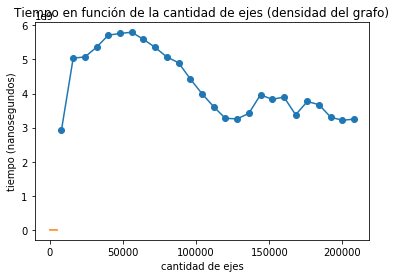

In [79]:

plt.plot(ejes, tiempos_ejes, marker='o')
plt.plot([z for z in range(0,5000)])
plt.xlabel("cantidad de ejes")
plt.ylabel("tiempo (nanosegundos)")
plt.title("Tiempo en función de la cantidad de ejes (densidad del grafo)")
#plt.legend(loc=4)
plt.savefig("tiempo_ejes"+ ".png")
plt.show()

## Variando P

In [130]:
ejecutable = '../src/tp1'
#p = 0.85
file_input_p = 'cuantitativos/test-p'
file_tiempos_p = 'tiempos_p.txt'
file_output_p = file_input


In [131]:
nodos_p= 1000
ejes_p = 8000
repeticiones_p= 5

ps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]

In [132]:
tiempos_p = []
for p in ps:
    grafo = nx.gnm_random_graph(nodos_p, ejes_p, seed=546412, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(nodos_p, ejes_p, seed=546412, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input_p+'-p'+str(p)+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones_p):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones)
    tiempos_p.append(tiempo_acum) 
   

In [134]:
with open(file_tiempos_p, 'w') as f:
    for e, t in zip(ejes, tiempos_p):
        f.write(str(e)+' '+str(t)+'\n')
tiempos_ejes

[5924540000.0,
 4448090000.0,
 3529450000.0,
 3402530000.0,
 3487180000.0,
 3580060000.0,
 3524480000.0,
 3334180000.0,
 3205930000.0,
 3229820000.0]

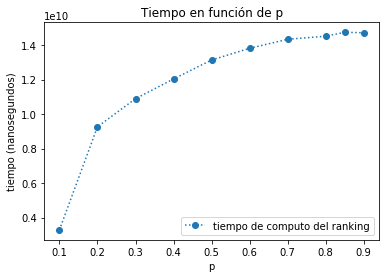

In [139]:
plt.plot(ps, tiempos_p, marker='o', linestyle = ':', label = "tiempo de computo del ranking")
plt.xlabel("p")
plt.ylabel("tiempo (nanosegundos)")
plt.title("Tiempo en función de p")
plt.legend(loc=4)
plt.savefig("tiempo_p"+".png")
plt.show()